## Análisis de datos

### Importación de datos



In [38]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


###1. Análisis de facturación



In [39]:
ingresot1=tienda.Precio.sum()
ingresot2=tienda2.Precio.sum()
ingresot3=tienda3.Precio.sum()
ingresot4=tienda4.Precio.sum()
print(ingresot1)
print(ingresot2)
print(ingresot3)
print(ingresot4)

1150880400.0
1116343500.0
1098019600.0
1038375700.0


### 2. Ventas por categoría

#### Cantidad de productos vendidos por categoría

In [40]:
cuentaMasVendidost1=tienda.groupby(['Producto','Categoría del Producto'])[['Precio']].count()
aux=cuentaMasVendidost1.groupby('Categoría del Producto')[['Precio']].sum().sort_values('Precio',ascending=False)
cuentaMasVendidost1=aux.rename(columns={'Precio':'Cantidad'})
cuentaMasVendidost1

,Cantidad
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [41]:
cuentaMasVendidost2=tienda2.groupby(['Producto','Categoría del Producto'])[['Precio']].count()
aux=cuentaMasVendidost2.groupby('Categoría del Producto')[['Precio']].sum().sort_values('Precio',ascending=False)
cuentaMasVendidost2=aux.rename(columns={'Precio':'Cantidad'})
print(f'{cuentaMasVendidost2}\n')

cuentaMasVendidost3=tienda3.groupby(['Producto','Categoría del Producto'])[['Precio']].count()
aux=cuentaMasVendidost3.groupby('Categoría del Producto')[['Precio']].sum().sort_values('Precio',ascending=False)
cuentaMasVendidost3=aux.rename(columns={'Precio':'Cantidad'})
print(f'{cuentaMasVendidost3}\n')

cuentaMasVendidost4=tienda4.groupby(['Producto','Categoría del Producto'])[['Precio']].count()
aux=cuentaMasVendidost4.groupby('Categoría del Producto')[['Precio']].sum().sort_values('Precio',ascending=False)
cuentaMasVendidost4=aux.rename(columns={'Precio':'Cantidad'})
print(f'{cuentaMasVendidost4}\n')


                         Cantidad
Categoría del Producto           
Muebles                       442
Electrónicos                  422
Juguetes                      313
Electrodomésticos             305
Deportes y diversión          275
Instrumentos musicales        224
Libros                        197
Artículos para el hogar       181

                         Cantidad
Categoría del Producto           
Muebles                       499
Electrónicos                  451
Juguetes                      315
Electrodomésticos             278
Deportes y diversión          277
Libros                        185
Artículos para el hogar       177
Instrumentos musicales        177

                         Cantidad
Categoría del Producto           
Muebles                       480
Electrónicos                  451
Juguetes                      338
Deportes y diversión          277
Electrodomésticos             254
Artículos para el hogar       201
Libros                        187
Instrumentos

#### Categorías más populares por tienda

In [55]:
print(f'{cuentaMasVendidost2.head(3)}\n')
print(f'{cuentaMasVendidost3.head(3)}\n')
print(f'{cuentaMasVendidost4.head(3)}\n')
print(f'{cuentaMasVendidost1.head(3)}\n')


                        Cantidad
Categoría del Producto          
Muebles                      442
Electrónicos                 422
Juguetes                     313

                        Cantidad
Categoría del Producto          
Muebles                      499
Electrónicos                 451
Juguetes                     315

                        Cantidad
Categoría del Producto          
Muebles                      480
Electrónicos                 451
Juguetes                     338

                        Cantidad
Categoría del Producto          
Muebles                      465
Electrónicos                 448
Juguetes                     324



### 3. Calificación promedio de la tienda


In [42]:
#Calificación general
calificaciont1=tienda.Calificación.mean()
calificaciont1

np.float64(3.976685036032217)

In [43]:
#Calificaion por producto
calificacionest1=tienda.groupby('Producto').Calificación.mean()
calificacionest1

,Calificación
Producto,
Ajedrez de madera,4.428571
Armario,3.950000
Asistente virtual,4.075000
Auriculares,3.640000
Auriculares con micrófono,3.969697
Balón de baloncesto,3.872727
Balón de voleibol,4.071429
Batería,4.188679
Bicicleta,3.944444


In [44]:
calificaciont2=tienda2.Calificación.mean()
calificaciont3=tienda3.Calificación.mean()
calificaciont4=tienda4.Calificación.mean()
calificacionest2=tienda2.groupby('Producto').Calificación.mean()
calificacionest3=tienda3.groupby('Producto').Calificación.mean()
calificacionest4=tienda4.groupby('Producto').Calificación.mean()
print(f'Calificacion de la tienda 1: {calificaciont1}')
print(f'Calificacion de la tienda 2: {calificaciont2}')
print(f'Calificacion de la tienda 3: {calificaciont3}')
print(f'Calificacion de la tienda 4: {calificaciont4}')

Calificacion de la tienda 1: 3.976685036032217
Calificacion de la tienda 2: 4.037303942348453
Calificacion de la tienda 3: 4.048325561678677
Calificacion de la tienda 4: 3.9957591178965224


### 4. Productos más y menos vendidos

In [45]:
masVendidost1=tienda.groupby('Producto')[['Precio']].count()
masVendidost1=masVendidost1.rename(columns={'Precio':'Cantidad'})
masVendidost1=masVendidost1.sort_values('Cantidad',ascending=False)
print(f'Productos más vendidos de la tienda 1\n{masVendidost1.head(5)}\n')
print(f'Productos menos vendidos de la tienda 1\n{masVendidost1.tail(5)}\n')

Productos más vendidos de la tienda 1
                  Cantidad
Producto                  
Armario                 60
TV LED UHD 4K           60
Microondas              60
Secadora de ropa        58
Mesa de noche           56

Productos menos vendidos de la tienda 1
                           Cantidad
Producto                           
Mochila                          39
Pandereta                        36
Olla de presión                  35
Celular ABXY                     33
Auriculares con micrófono        33



In [46]:
masVendidost2=tienda2.groupby('Producto')[['Precio']].count()
masVendidost2=masVendidost2.rename(columns={'Precio':'Cantidad'})
masVendidost2=masVendidost2.sort_values('Cantidad',ascending=False)
print(f'Productos más vendidos de la tienda 2\n{masVendidost2.head(5)}\n')
print(f'Productos menos vendidos de la tienda 2\n{masVendidost2.tail(5)}\n')
masVendidost3=tienda3.groupby('Producto')[['Precio']].count()
masVendidost3=masVendidost3.rename(columns={'Precio':'Cantidad'})
masVendidost3=masVendidost3.sort_values('Cantidad',ascending=False)
print(f'Productos más vendidos de la tienda 3\n{masVendidost3.head(5)}\n')
print(f'Productos menos vendidos de la tienda 3\n{masVendidost3.tail(5)}\n')
masVendidost4=tienda4.groupby('Producto')[['Precio']].count()
masVendidost4=masVendidost4.rename(columns={'Precio':'Cantidad'})
masVendidost4=masVendidost4.sort_values('Cantidad',ascending=False)
print(f'Productos más vendidos de la tienda 4\n{masVendidost4.head(5)}\n')
print(f'Productos menos vendidos de la tienda 4\n{masVendidost4.tail(5)}\n')

Productos más vendidos de la tienda 2
                           Cantidad
Producto                           
Iniciando en programación        65
Microondas                       62
Batería                          61
Pandereta                        58
Guitarra acústica                58

Productos menos vendidos de la tienda 2
                 Cantidad
Producto                 
Auriculares            37
Sillón                 35
Impresora              34
Mesa de comedor        34
Juego de mesa          32

Productos más vendidos de la tienda 3
                 Cantidad
Producto                 
Kit de bancas          57
Mesa de comedor        56
Cama king              56
Set de ollas           55
Mesa de noche          55

Productos menos vendidos de la tienda 3
                         Cantidad
Producto                         
Guitarra eléctrica             38
Mochila                        36
Microondas                     36
Set de vasos                   36
Bloques de construcci

### 5. Envío promedio por tienda

In [58]:
costo_envio_promedio_t1=tienda['Costo de envío'].mean()
print(f"Costo promedio de envío de la tienda 1: {costo_envio_promedio_t1:.2f}")

Costo promedio de envío de la tienda 1: 26018.61


In [59]:
costo_envio_promedio_t2=tienda2['Costo de envío'].mean()
print(f"Costo promedio de envío de la tienda 2: {costo_envio_promedio_t2:.2f}")
costo_envio_promedio_t3=tienda3['Costo de envío'].mean()
print(f"Costo promedio de envío de la tienda 3: {costo_envio_promedio_t3:.2f}")
costo_envio_promedio_t4=tienda4['Costo de envío'].mean()
print(f"Costo promedio de envío de la tienda 4: {costo_envio_promedio_t4:.2f}")

Costo promedio de envío de la tienda 2: 25216.24
Costo promedio de envío de la tienda 3: 24805.68
Costo promedio de envío de la tienda 4: 23459.46


## Visualización

### Generando gráfico

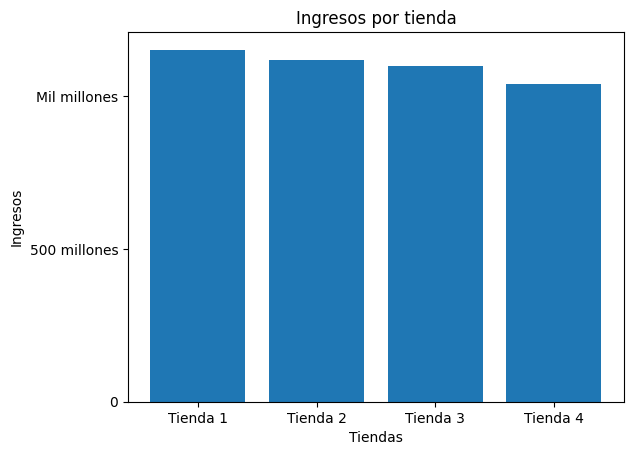

In [49]:
from matplotlib import pyplot as plt
#grafico de ventas totales
tiendas=['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
ingresos=[ingresot1,ingresot2,ingresot3,ingresot4]
plt.bar(tiendas, ingresos)
plt.yticks(np.arange(0, 1300000000, 500000000),['0','500 millones','Mil millones'])
plt.xlabel('Tiendas')
plt.ylabel('Ingresos')
plt.title('Ingresos por tienda')
plt.show()

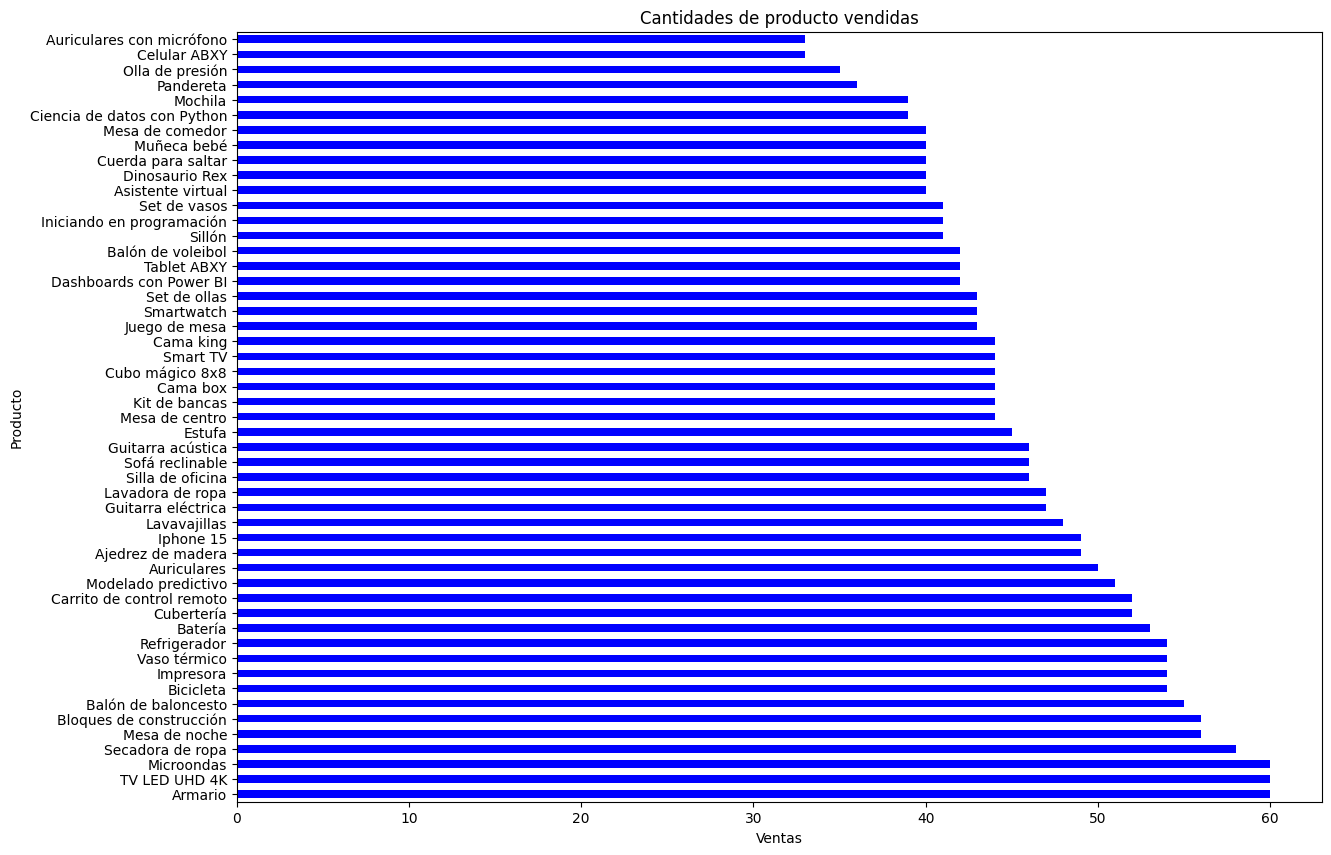

In [50]:
masVendidost1.plot(kind='barh', figsize=(14,10), color='blue',xlabel="Ventas",title="Cantidades de producto vendidas", legend=False );

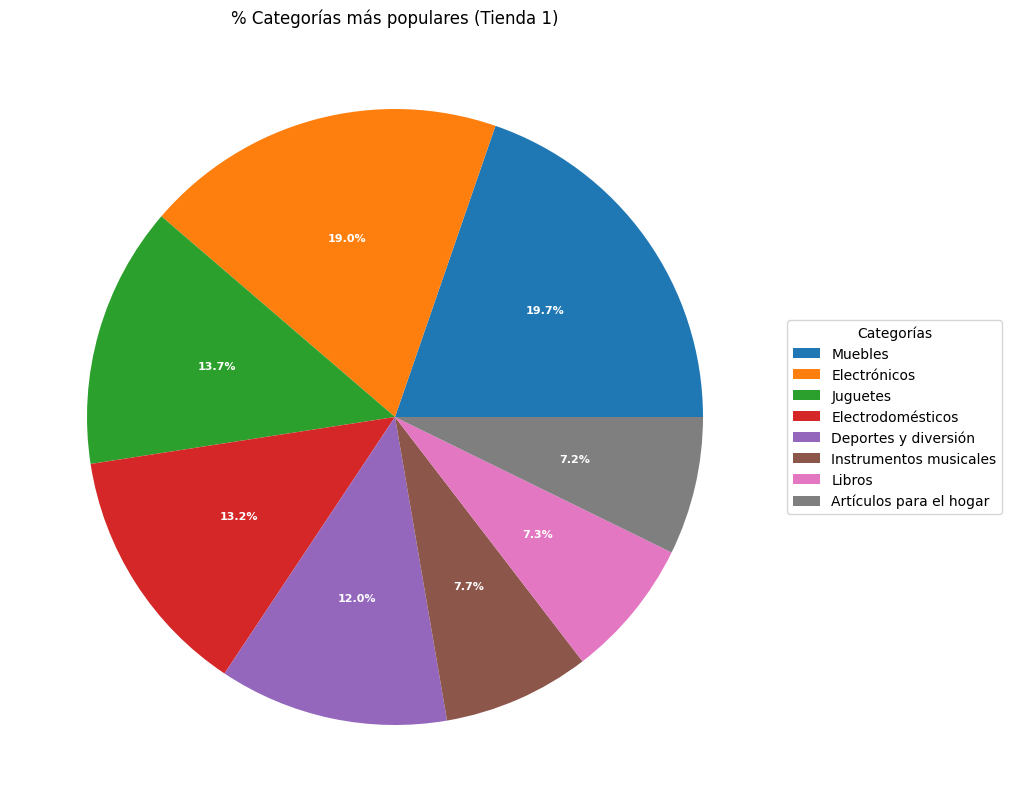

In [51]:
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw=dict(aspect="equal"))

data = cuentaMasVendidost1['Cantidad'].values
cat = cuentaMasVendidost1.index.to_list()


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, cat,
          title="Categorías",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("% Categorías más populares (Tienda 1)")

plt.show()

## Informe final

Esta es la información recopilada de la base de datos con respecto a los puntos solicitados por el cliente
*   Los ingresos totales de las tiendas.

  Ingresos de la tienda 1: 1150880400.0

  Ingresos de la tienda 2: 1116343500.0

  Ingresos de la tienda 3: 1098019600.0

  Ingresos de la tienda 4: 1038375700.0

  Se percibe a la tienda 1 cómo la tienda con mayor ingresos y a la tienda 4 cómo la tienda con menor ingresos

*   Las categorías de productos más y menos vendidas.

  Como podemos observar en la tercer gráfica los productos de muebles, electrónicos y juguetes son los más solicitados. Los articulos para el hogar, instrumentos musicales y los libros son los menos vendidos. En todas las tiendas se repite el mismo orden para las categorías populares, las menos populares cambian de orden aunque siguen siendo las mismas.

*   Las calificaciones promedio de los clientes por tienda.

  Calificacion de la tienda 1: 3.97
  
  Calificacion de la tienda 2: 4.03
  
  Calificacion de la tienda 3: 4.04
  
  Calificacion de la tienda 4: 3.99

  Las tiendas 2 y 3 destacan con una calificación promedio de casi 4, mientras que las tiendas 1 y 4 no quedan muy por debajo con calificaciones de practicamente 3.9 y una diferencia de sólo .02 entre ambas tiendas.

*   Los productos más y menos vendidos.

  No parece haber algun tipo de relación entre los productos más vendidos de una tienda con otra

*   El coste de envío promedio para cada tienda.

  Costo promedio de envío de la tienda 1: 26018.61

  Costo promedio de envío de la tienda 2: 25216.24

  Costo promedio de envío de la tienda 3: 24805.68

  Costo promedio de envío de la tienda 4: 23459.46

""""Conclusion""""

Deacuerdo con estos datos la diferencia más notable entre las tiendas es el ingreso total de cada una y los costos de envío. Debido a que los costos de envío son subsidiados por los consumidores el unico valor que realmente importa es el de los ingresos, esto nos lleva a considerar a la tienda 4 cómo la mejor opción a vender para el Sr. Juan

